#Algoritmo Genético Simples para Otimização Agrícola

Escolher a melhor combinação de insumos agrícolas (sementes, fertilizantes, defensivos, tecnologias etc.) para maximizar o benefício/produtividade, respeitando limites de recursos financeiros e hídricos da fazenda.

#Quais insumos usar?  um produtor precisa sempre equilibrar três pontos:

 - Retorno esperado (benefício)

 - Quanto custa adotar aquele insumo (custo)

- Quanto de água ele exige (água)

Esses três fatores conflitam entre si e representam as principais variáveis.

# O que representa cada dado?

## Benefício:

Representa o “valor agregado” do insumo, como:

- aumento de produtividade,

- aumento no retorno financeiro,

- ganho na qualidade da safra.


##Custo

É quanto o insumo pesa no orçamento da fazenda:

- fertilizantes mais caros,

- sementes mais caras,

- defensivos com maior concentração,

No algoritmo, é uma restrição: não podemos ultrapassar o orçamento máximo.


## Água

Representa o quanto o insumo exige em termos de:

- irrigação,

- umidade necessária,

- frequência de aplicação.

É extremamente crítico porque a água é um recurso limitado.

No algoritmo, também é uma restrição: não podemos ultrapassar o limite hídrico disponível.

# Como esses três dados se relacionam?

O modelo tenta simular a seguinte situação real:

Selecionar o conjunto de insumos que maximiza o benefício total, mas sem ultrapassar:

o dinheiro disponível e a água disponível.


# O algoritmo genético funciona simulando um processo evolutivo:

1. Gera uma população inicial aleatória

2. Avalia cada indivíduo (fitness)

3. Seleciona os melhores (seleção)

4. Cruza indivíduos (crossover)

5. Aplica mutações (mutation)

6. Repete por várias gerações

7. Retorna a melhor solução encontrada

##Gerar dados e salvar em arquivo

## gerando 20 culturas aleatórias com determinadas caracteristicas

In [47]:
import json
import random

def gerar_dados(qtd_itens=20):
  dados = []
  for i in range(qtd_itens):
      dados.append({
      "beneficio": random.randint(50, 300),
      "custo": random.randint(20, 200),
      "agua": random.randint(10, 80)
      })
      with open("farm_items.json", "w") as f:
        json.dump(dados, f, indent=4)

Cria uma lista de itens agrícolas fictícios

Cada item possui:

benefício

custo

consumo de água

### Lendo dados do arquivo

In [29]:
def carregar_dados():
  with open("farm_items.json", "r") as f:
    return json.load(f)

In [30]:
def fitness(individuo, itens, max_custo=800, max_agua=500):
  beneficio = 0
  custo = 0
  agua = 0


  for gene, item in zip(individuo, itens):
    if gene == 1:
      beneficio += item["beneficio"]
      custo += item["custo"]
      agua += item["agua"]


  if custo > max_custo or agua > max_agua:
    return 0

  return beneficio

In [31]:
# Criando individuo
def criar_individuo(tamanho):
  return [random.randint(0, 1) for _ in range(tamanho)]



# Seleção

def selecao(populacao, scores):
  i1, i2 = random.sample(range(len(populacao)), 2)
  return populacao[i1] if scores[i1] > scores[i2] else populacao[i2]

Escolhe dois indivíduos aleatórios

Retorna o mais forte

É uma forma simples e rápida de seleção

##Crossover

In [32]:
def crossover(p1, p2, taxa=0.8):
  if random.random() > taxa:
    return p1[:]
  ponto = random.randint(1, len(p1) - 1)
  return p1[:ponto] + p2[ponto:]

Com 80% de probabilidade, corta os pais e mistura genes

##Mutação

In [33]:
def mutacao(individuo, taxa=0.05):
  for i in range(len(individuo)):
    if random.random() < taxa:
      individuo[i] = 1 - individuo[i]
  return individuo

Cada gene tem 5% de chance de mudar de 0 → 1 ou 1 → 0
Evita que a população fique presa em uma solução ruim.

##Algoritimo Genético Principal

In [34]:
def genetic_algorithm(geracoes=50, pop_size=40):
  itens = carregar_dados()
  tamanho = len(itens)


  populacao = [criar_individuo(tamanho) for _ in range(pop_size)]


  for g in range(geracoes):
    scores = [fitness(ind, itens) for ind in populacao]
    nova_pop = []


    for _ in range(pop_size):
      p1 = selecao(populacao, scores)
      p2 = selecao(populacao, scores)
      filho = crossover(p1, p2)
      filho = mutacao(filho)
      nova_pop.append(filho)


    populacao = nova_pop


  scores = [fitness(ind, itens) for ind in populacao]
  best_idx = scores.index(max(scores))
  return populacao[best_idx], max(scores)

Ciclo evolutivo:

1. Avalia indivíduos

2. Seleciona pais

3. Gera filhos

4. Aplica mutação

5. Repete por várias gerações

6. Ao final retorna o melhor indivíduo

##Executando o código

In [46]:
if __name__ == "__main__":
  gerar_dados() # gera somente uma vez
  melhor, score = genetic_algorithm()
  print("Melhor solução encontrada:", melhor)
  print("Score:", score)

Melhor solução encontrada: [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
Score: 1999


Cada elemento 0 ou 1 representa uma decisão binária para cada cultura:

1 → plantar essa cultura

0 → não plantar essa cultura

O score é:

SOMA DOS BENEFÍCIOS das culturas escolhidas

Imagine que temos uma tabela assim:

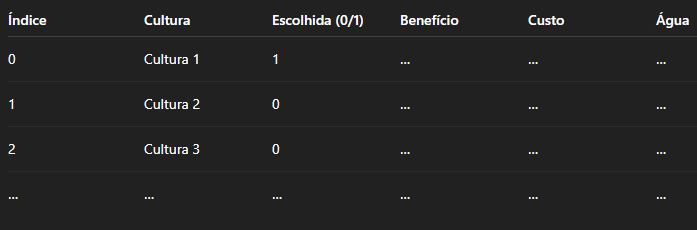

O algoritmo percorre cada cultura e decide:

"vale a pena incluir?"

"respeita as restrições?"

"melhora a solução total?"

As posições 1 do vetor indicam as culturas selecionadas.